In [ ]:
# 1. ライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# 3. データの読み込み
df = pd.read_csv("salary.csv")
df

,age,education,company_size,salary
0,22,middle,large,207.8
1,22,middle,middle,187.5
2,22,middle,small,196.5
3,27,middle,large,225.6
4,27,middle,middle,208.1
...,...,...,...,...
115,62,university,middle,380.3
116,62,university,small,332.2
117,67,university,large,413.7
118,67,university,middle,398.2


In [11]:
# 4. 大企業のみのデータ
large = df[df['company_size'] == 'large']

<Axes: >

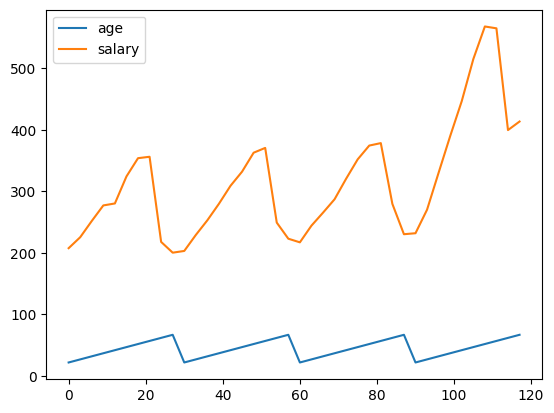

In [13]:
# 6. データのプロット
large.plot()


In [16]:
# 7. 回帰用データの作成
df = df[df['age'] < 55]
inputs = df.drop('salary', axis=1)

In [18]:
# 8. ダミー変数の作成
inputs = pd.get_dummies(inputs)
inputs

,age,education_high,education_middle,education_tech,education_university,company_size_large,company_size_middle,company_size_small
0,22,False,True,False,False,True,False,False
1,22,False,True,False,False,False,True,False
2,22,False,True,False,False,False,False,True
3,27,False,True,False,False,True,False,False
4,27,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...
106,47,False,False,False,True,False,True,False
107,47,False,False,False,True,False,False,True
108,52,False,False,False,True,True,False,False
109,52,False,False,False,True,False,True,False


In [20]:
# 9. 重回帰分析
lr = LinearRegression()
lr.fit(inputs.values,df['salary'])


LinearRegression()

In [22]:
# 10. 係数の表示
labels = inputs.columns
pd.DataFrame({"Name":labels, "Coefficients": lr.coef_})

,Name,Coefficients
0,age,5.124881
1,education_high,-25.105952
2,education_middle,-29.434524
3,education_tech,-9.958333
4,education_university,64.498810
5,company_size_large,28.053571
6,company_size_middle,-9.214286
7,company_size_small,-18.839286


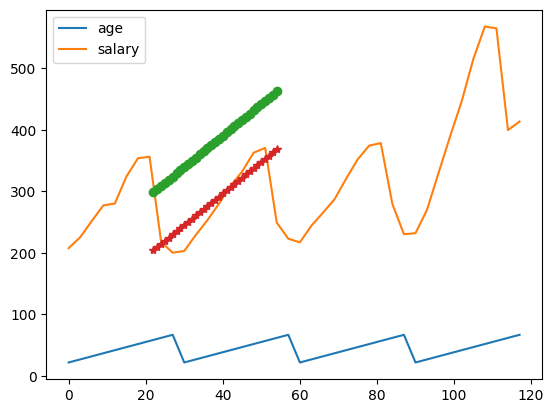

In [23]:
# 11.フィッティング結果のプロット
dic = dict(zip(labels, lr.coef_))
X = [i for i in range(22,55)]
a = dic["age"]
e1 = dic["education_university"]
e2 = dic["education_middle"]
s = dic["company_size_large"]
c = lr.intercept_
Y1 = [x * a + e1 + s + c for x in X]
Y2 = [x * a + e2 + s + c for x in X]
ax = large.plot()
ax.plot(X,Y1, marker='o')
ax.plot(X,Y2, marker='*')
